## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja wielomianowa

Regresja liniowa działa dobrze w sytuacji, gdy zmienna, której wartość chemy przewidzieć (zmienna objaśniana/zależna) jest liniowo zależna od zmiennych za pomocą których chcemy ją obliczyć (zmiennych objaśniających/niezależnych). Jak nietrudno się domyślić, takie założenie jest mocno ograniczające i w realnych problemach rzadko będzie ono spełniane. Pojawia się zatem pytanie, co zrobić, gdy wiemy, że dane nie spełniają założenia o liniowej zależności. Istnieje wiele algorytmów rozwiązujących takie problemy. Jednym z nich jest regresja wielomianowa.

Regresja wielomianowa polega na zmianie funkcji regresji tak, aby była to funkcja wielomianowa. Przykładowo, dla jednej zmiennej niezależnej można stworzyć model, którego funkcja regresji będzie wielomianem czwartego stopnia: 

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_1^4
\end{equation}

Pozwala to na stworzenie dowolnego kształtu funkcji, który będzie dopasowany do danych. Zwiekszanie krotności wielomianu spowoduje dokładniejsze dopasowanie do danych, jednak rodzi też pewne niebezpieczeństwa. Może okazać się, że taki model będzie zbyt mocno dopasowany do próbek uczących i nie będzie w stanie dokonywać poprawnych predykcji dla nowych, nieznanych próbek. Takie zjawisko nazywa się przeuczeniem modelu i istnieją różne metody do jego rozpoznania i przeciwdziałania. Nie jest to jednak przedmiotem tego notatnika. 

Cały proces trenowania i testowania modelu wygląda jak w przypadku regresji liniowej. Różnica polega jedynie na zmianie funkcji regresji.

Zbiór danych do tego zadania znajduje się w pliku "jaws.csv" i przedstawia zależność długości kości szczękowej jelenia od jego wieku. 

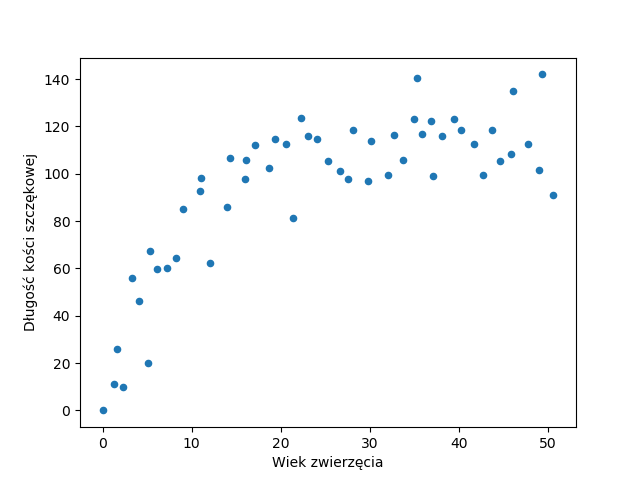

Na powyższym wykresie widać, że zależność na pewno nie jest liniowa. Szczęka zwierzęcia rośnie do pewnego wieku i później jej długość jest stała przez resztę życia. Spróbujemy rozwiązać ten problem za pomocą regresji wielomianowej.


### Zadanie 1
Aby stworzyć funkcję wielomianową konieczne jest dodanie nowych cech do istniejącego zestawu danych.  
Stwórz funkcję, która przetransformuje pojedynczą cechę do wektora cech, w którym kolejne elementy, to kolejne potęgi danej cechy. 

Przykład:  
transform_to_polynomial_feature(x, 5) -> $[x^1, x^2, x^3, x^4, x^5]$  
transform_to_polynomial_feature(x, 3) -> $[x^1, x^2, x^3]$

In [1]:
'''
input:
x - wartość zmiennej niezależnej
n - stopień wielomianu

output:
out: [] - lista o długości n z kolejnymi potęgami wejściowej cechy x
'''
def transform_to_polynomial_feature(x, n):
    out = []
    # YOUR CODE HERE
    for i in range(0, n + 1):
        out.append(x ** i)
    
    return out

print(transform_to_polynomial_feature(2, 5))

[1, 2, 4, 8, 16, 32]


### Zadanie 2

Zmodyfikuj swój kod z zadania z regresją liniową tak, aby dla zestawu danych x z jedną zmienną niezależną tworzył nieliniową funkcję regresji. Przetestuj rozwiązanie dla różnych wariantów stopnia wielomianu.
Pamiętaj, że konieczne dodanie dodatkowych cech do oryginalnego zbioru danych, które będą kolejnymi potęgami zmiennej niezależnej - wiek zwierzęcia. 

**UWAGA:** Przed podaniem zestawu danych na wejście modelu pomocna może okazać się operacja normalizacji danych, której celem jest sprowadzenie wartości cech do wspólnych przedziałów wartości. Aby to osiągnąc można wykorzystać [gotowe rozwiązania do standaryzacji lub skalowania min-max](https://scikit-learn.org/stable/modules/preprocessing.html) albo zaimplementować skalowanie samemu korzystając ze [wzoru](https://pl.wikipedia.org/wiki/Standaryzacja_(statystyka)).

In [2]:
# YOUR CODE HERE
import random

def f(X, B):
    return np.dot(X, B)

def ssr(X, y, B):
    fx = f(X, B)
    fx_diff = (fx.T - y).T
    return sum(fx_diff**2)/(2*len(X))

def gradient(X, y, B):
    fx = f(X, B)
    fx_diff = (fx.T - y).T
    return np.dot(X.T, fx_diff) / len(X)

def poly_x(X, n):
    new_x = []
    for i in X:
        new_x.append(transform_to_polynomial_feature(i[0], n))
    return np.array(new_x)

def learn_and_fit(X, y, n, epochs = 100000, alpha = 0.01):
    # YOUR CODE HERE
    X = poly_x(X, n)
    y = y.T
    B = np.array([[random.random()] for i in range(len(X[0]))])
    betas = []
    errors = []
    
    for i in range(epochs):
        ssr_val = ssr(X, y, B)
        gradient_val = gradient(X, y, B)
        B = B - alpha * gradient_val
        betas.append(B)
        errors.append(ssr_val)
        
    return betas, errors


### Zadanie 3

Stwórz wykres na którym będą znajdować się dane ze zbioru _jaws.csv_ oraz funkcje regresji wielomianowej dla wielomianu pierwszego, czwartego i piątego stopnia. 

Opisz wykres. Jak zmienia się funkcja regresji wraz z dodawaniem kolejnych stopni wielomianu? Czy widzisz jakąś inną możliwą transformację funkcji regresji tak, żeby rozwiązała analizowany problem?

Text(0, 0.5, 'Bone length')

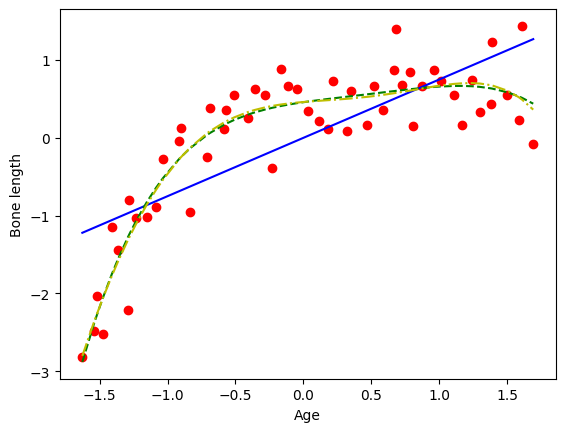

In [3]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calc_poly(betas, x):
    result = 0
    power = 0
    for i in betas:
        result += i * (x ** power)
        power += 1
    return result

df = pd.read_csv('data/jaws.csv', sep=',').sort_values(['age'])
normalized_df = (df - df.mean()) / df.std()

nx = normalized_df['age'].values.reshape(df['age'].shape[0], 1)
ny = normalized_df['bone'].values.reshape(df['bone'].shape[0], 1)

plt.plot(nx, ny, 'ro')

#n = 1
betas1, errors1 = learn_and_fit(nx ,ny, 1)
y1 = [calc_poly(betas1[-1], i) for i in nx]
plt.plot(nx, y1, 'b-')

# #n = 4
betas4, errors4 = learn_and_fit(nx, ny, 4)
y4 = [calc_poly(betas4[-1], i) for i in nx]
plt.plot(nx, y4, 'g--')

# #n = 5
betas5, errors5 = learn_and_fit(nx, ny, 5)
y5 = [calc_poly(betas5[-1], i) for i in nx]
plt.plot(nx, y5, 'y-.')

plt.xlabel("Age")
plt.ylabel("Bone length")

#### YOUR ANSWER HERE
Funkcja regresji zmieniła się znacząco przy zmianie stopnia wielomianu z 1 na 4, natomiast po zmianie z 4 na 5 praktycznie niezauważalnie w obserwowanym zakresie danych. Można rozwinąć funkcję regresji w taki sposób aby mogła aproksymować funkcją pierwiastka kwadratowego lub logarytmu. Wtedy mogłaby lepiej przybliżać wartości analizowanego zbioru danych.